In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
df_auto=pd.read_csv('auto-mpg.csv')
df_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [5]:
df_auto.shape

(398, 9)

In [6]:
df_auto.info()
#There are no null values but horsepower should be int

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [11]:
df_auto['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
200     1
142     1
138     1
113     1
82      1
Name: horsepower, Length: 94, dtype: int64

In [13]:
df_auto['horsepower']=df_auto['horsepower'].replace('?',np.NaN)

In [14]:
df_auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [17]:
df_auto['horsepower']=df_auto['horsepower'].replace(np.NaN, 0)
df_auto['horsepower']=df_auto['horsepower'].astype('int')
df_auto['horsepower']=df_auto['horsepower'].replace(0,np.NaN)
#To change the missing value to zero, then change the datatype to int then change it to NaN

In [18]:
df_auto['horsepower']=df_auto['horsepower'].fillna(df_auto['horsepower'].mean())
#To fill the missing values with mean

In [19]:
df_auto.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [21]:
df_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [22]:
df_auto_corr=df_auto.corr()
df_auto_corr
#Mpg has strongly negative relationship with cylinders, displacement, horsepower, weight
#MPG has positive relationship with acceleration, model year, origin

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259,-0.411651,-0.453669
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.411651,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.453669,-0.581024,0.205873,0.180662,1.000000


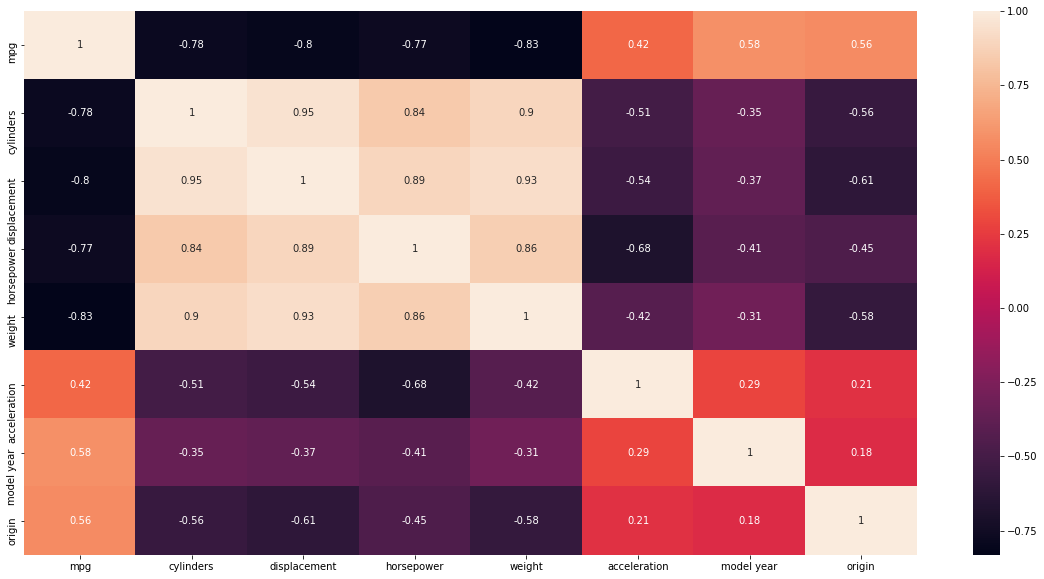

In [23]:
#Correlation between attributes
plt.figure(figsize=(20, 10))
sns.heatmap(df_auto_corr, annot=True)
plt.show()

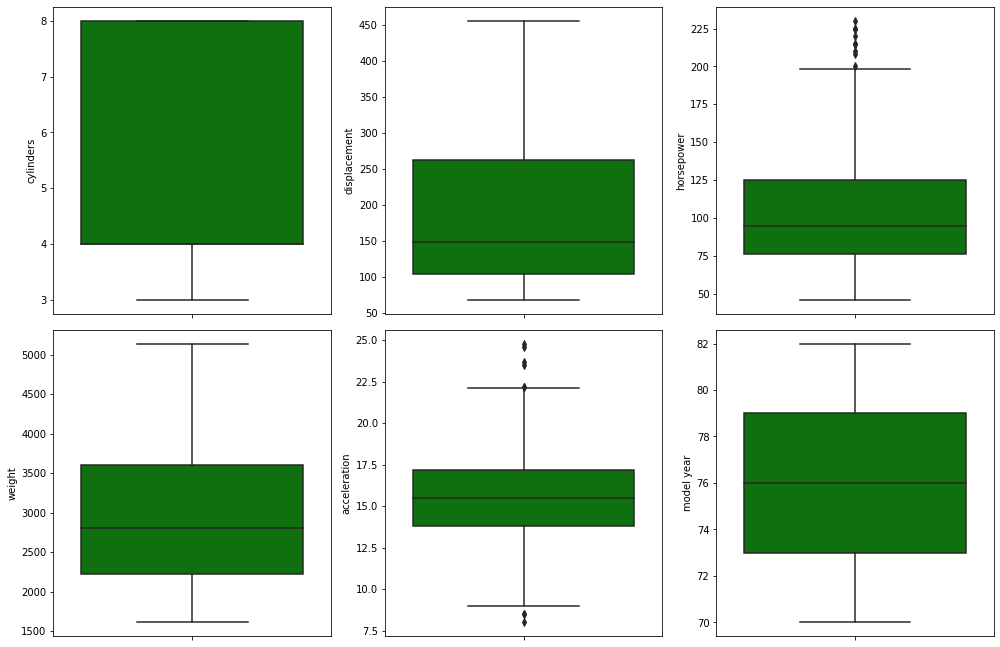

In [24]:
col_list=df_auto.iloc[:,1:7].columns.values
plt.figure(figsize=(14,18))
for i in range(0, len(col_list)):                                      
    plt.subplot(4,3,i+1)
    sns.boxplot(df_auto[col_list[i]], color="green", orient='v')
    plt.tight_layout()
#Box Plot for outliers

In [25]:
df_auto1=df_auto.iloc[:,1:7]
from scipy.stats import zscore
z_score=abs(zscore(df_auto1))
print(df_auto.shape)
df_auto1_final=df_auto1.loc[(z_score<3).all(axis=1)]                  
print(df_auto1_final.shape)
#to quantify the outliers

(398, 9)
(391, 6)


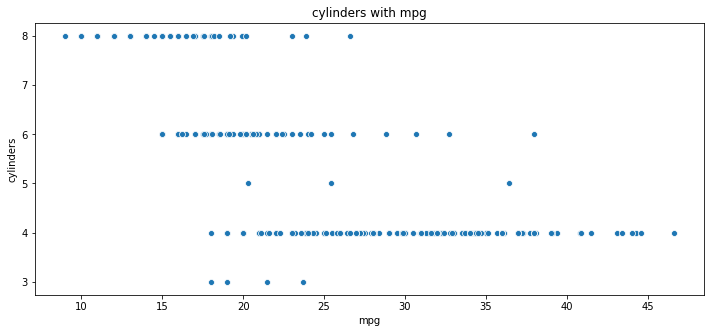

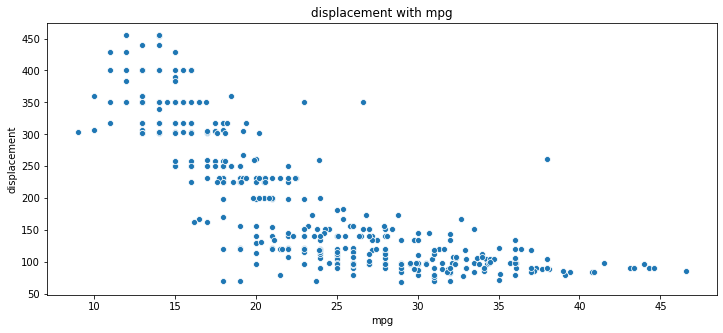

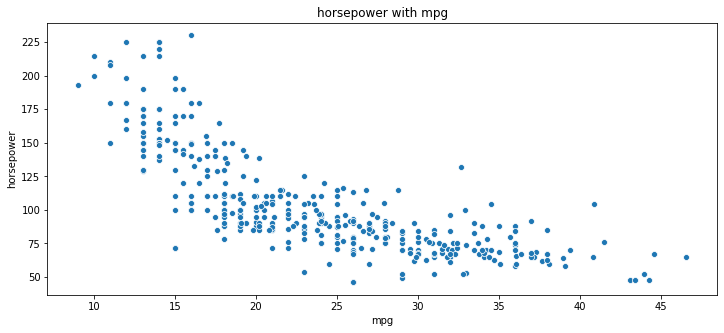

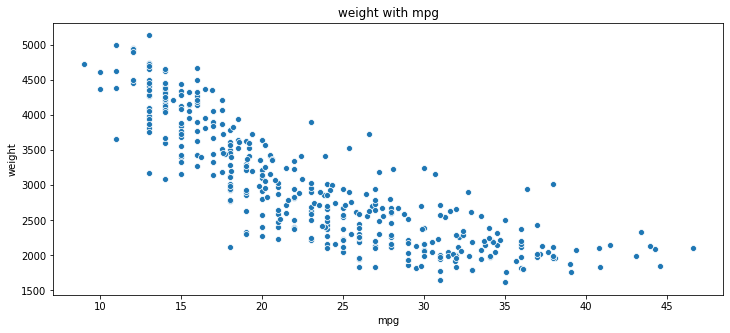

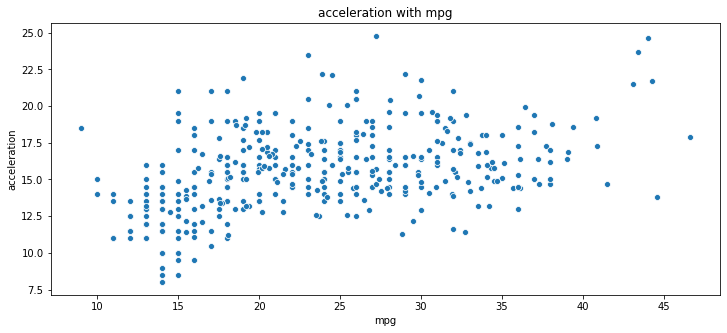

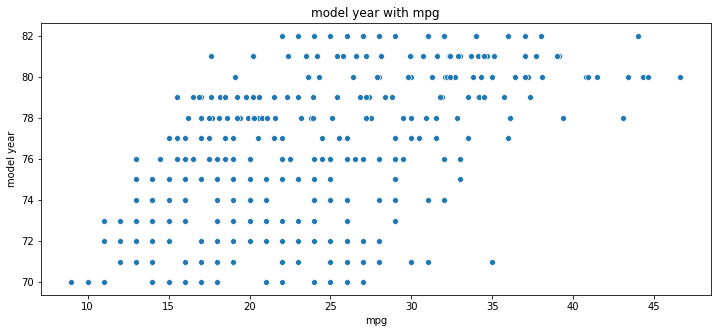

In [26]:
#Scatter Plot to show the relationships between target and feature attributes
cols = df_auto.iloc[:,1:7]
for col in cols:
    plt.figure(figsize=(12, 5))
    plt.title(str(col) +' with' + ' mpg')
    sns.scatterplot(x=df_auto['mpg'], y=df_auto[col], data=df_auto)
    plt.show()

In [27]:
#Splitting of data
x = df_auto.iloc[:,1:7]
y = df_auto['mpg']

In [28]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [29]:
#Testing the models at random state 42 along with their r2 score
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.20)
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor(),RandomForestRegressor()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(r2_score(y_test,predm))
#After the testing several models, we have found that RandomForestRegressor is giving highest r2 score at random state 42.

0.8244069426990219
0.7756965281900386
0.8624683746169762
0.873491911951123
0.9000117371069385


In [30]:
#Now we will check at what randome state, RandomForestRegressor model will give highest r2 score.
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=RandomForestRegressor()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)
#Max. r2 score with RandomForestRegressor model is  0.9269545995701952, which is at random state 91

r2 score corresponding to random state:  42  is:  0.9027199223121392
r2 score corresponding to random state:  43  is:  0.9093049239504961
r2 score corresponding to random state:  44  is:  0.8486457815318118
r2 score corresponding to random state:  45  is:  0.835168535386948
r2 score corresponding to random state:  46  is:  0.8974062273880393
r2 score corresponding to random state:  47  is:  0.8451373629468262
r2 score corresponding to random state:  48  is:  0.823105949368127
r2 score corresponding to random state:  49  is:  0.8902557463720441
r2 score corresponding to random state:  50  is:  0.809766935697068
r2 score corresponding to random state:  51  is:  0.8858158419013872
r2 score corresponding to random state:  52  is:  0.7716201706160392
r2 score corresponding to random state:  53  is:  0.8686369825069723
r2 score corresponding to random state:  54  is:  0.8020641185461084
r2 score corresponding to random state:  55  is:  0.8840026191585768
r2 score corresponding to random stat

In [31]:
#Cross Validation of RFR
from sklearn.model_selection import cross_val_score
cross_val_score(RandomForestRegressor(),x,y,cv=5,scoring='r2').mean()

0.7492314179280644

In [34]:
#Implementing RandomForestRegressor model at random state 91
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=91,test_size=0.20)
rfr=RandomForestRegressor()            
rfr.fit(x_train,y_train)
rfr.score(x_train,y_train)
y_pred=rfr.predict(x_test)
print(r2_score(y_test,y_pred))

0.9288368676808385


In [35]:
#Saving the model
import joblib
filename = 'Project15_model.sav'
joblib.dump(rfr, filename)

['Project15_model.sav']